# 多项式回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 随机生成一个X
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

In [3]:
# 多项式
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

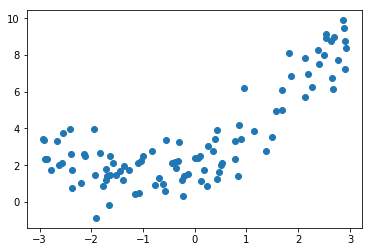

In [4]:
plt.scatter(X, y)

In [5]:
# 线性回归处理
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
# 预测值
y_predict = lin_reg.predict(X)

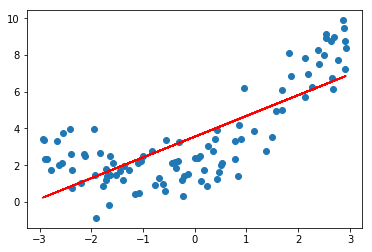

In [7]:
plt.scatter(X, y)
plt.plot(X, y_predict, color="r")

# 解决方案，添加一个特征

In [8]:
(X**2).shape

(100, 1)

In [9]:
X2 = np.hstack([X, X**2])

In [10]:
X2.shape

(100, 2)

In [11]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

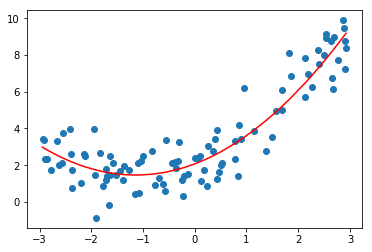

In [12]:
plt.scatter(X, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color="r")

In [13]:
lin_reg2.coef_

array([1.06622255, 0.46618155])

In [14]:
lin_reg2.intercept_

2.0784886731075347

# sklearn中使用多项式回归和Pipeline

In [15]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 +x + 2 + np.random.normal(0, 1, 100)

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
# 进行2次线性回归模型拟合
poly = PolynomialFeatures(degree=2) # 2次多项式特征生成器
poly.fit(X)
X2 = poly.transform(X)

In [18]:
X2.shape

(100, 3)

In [19]:
X2[:5,:]

array([[ 1.        ,  0.77672002,  0.60329398],
       [ 1.        , -0.39043861,  0.15244231],
       [ 1.        , -2.89906776,  8.40459389],
       [ 1.        , -0.45389544,  0.20602107],
       [ 1.        , -0.80562337,  0.64902901]])

In [20]:
# 建立模型预测
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

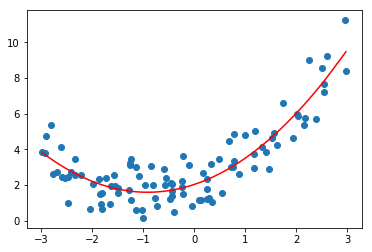

In [21]:
 # 画出线性回归的图
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color="r")

# 关于PolynomialFeatures

In [22]:
X = np.arange(1, 11).reshape(-1, 2)

In [23]:
X.shape

(5, 2)

In [24]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [25]:
# 处理后变量顺序为（1,a,b,a^2,ab, b^2）
poly = PolynomialFeatures()
poly.fit(X)
X3 = poly.transform(X)

In [26]:
X3.shape

(5, 6)

In [27]:
X3

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

# Pipeline

In [28]:
# 示例
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 +x + 2 + np.random.normal(0, 1, 100)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 实例化Pipeline
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)), # 多项式特征
    ("std_scaler", StandardScaler()), # 数值的均一化
    ("lin_reg", LinearRegression()) # 线性回归
])

In [31]:
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

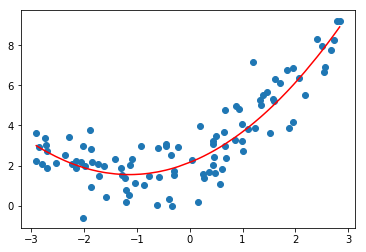

In [32]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color="r")